In [ ]:
# check Google Colab GPU

In [1]:
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-9380c2d8-3470-b4e7-d291-0dac276cca76)


In [ ]:
# Import and preprocess image dataset

In [4]:
from google.colab import drive
import zipfile

In [5]:
drive.mount("/content/drive", force_remount=True)

zip=zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/food 101.zip')
zip.extractall()
zip.close()

Mounted at /content/drive


In [6]:
! pip install split-folders

In [7]:
import splitfolders

splitfolders.ratio("/content/food 101", output="output", seed=365, ratio=(0.8,0.1,0.1))

Copying files: 101000 files [01:49, 919.95 files/s] 


In [84]:
import os

In [ ]:
for dirpaths, dirnames, filenames in os.walk ("/content/output/train"):
  print (f"there are {len(filenames)} images and {len(dirnames)} directories in {dirpaths}")

there are 0 images and 101 directories in /content/output/train
there are 800 images and 0 directories in /content/output/train/nachos
there are 800 images and 0 directories in /content/output/train/takoyaki
there are 800 images and 0 directories in /content/output/train/falafel
there are 800 images and 0 directories in /content/output/train/seaweed_salad
there are 800 images and 0 directories in /content/output/train/churros
there are 800 images and 0 directories in /content/output/train/foie_gras
there are 800 images and 0 directories in /content/output/train/eggs_benedict
there are 800 images and 0 directories in /content/output/train/baby_back_ribs
there are 800 images and 0 directories in /content/output/train/deviled_eggs
there are 800 images and 0 directories in /content/output/train/oysters
there are 800 images and 0 directories in /content/output/train/french_toast
there are 800 images and 0 directories in /content/output/train/tuna_tartare
there are 800 images and 0 directori

In [ ]:
for dirpaths, dirnames, filenames in os.walk ("/content/output/val"):
  print (f"there are {len(filenames)} images and {len(dirnames)} directories in {dirpaths}")

there are 0 images and 101 directories in /content/output/val
there are 100 images and 0 directories in /content/output/val/nachos
there are 100 images and 0 directories in /content/output/val/takoyaki
there are 100 images and 0 directories in /content/output/val/falafel
there are 100 images and 0 directories in /content/output/val/seaweed_salad
there are 100 images and 0 directories in /content/output/val/churros
there are 100 images and 0 directories in /content/output/val/foie_gras
there are 100 images and 0 directories in /content/output/val/eggs_benedict
there are 100 images and 0 directories in /content/output/val/baby_back_ribs
there are 100 images and 0 directories in /content/output/val/deviled_eggs
there are 100 images and 0 directories in /content/output/val/oysters
there are 100 images and 0 directories in /content/output/val/french_toast
there are 100 images and 0 directories in /content/output/val/tuna_tartare
there are 100 images and 0 directories in /content/output/val/

In [ ]:
for dirpaths, dirnames, filenames in os.walk ("/content/output/test"):
  print (f"there are {len(filenames)} images and {len(dirnames)} directories in {dirpaths}")

there are 0 images and 101 directories in /content/output/test
there are 100 images and 0 directories in /content/output/test/nachos
there are 100 images and 0 directories in /content/output/test/takoyaki
there are 100 images and 0 directories in /content/output/test/falafel
there are 100 images and 0 directories in /content/output/test/seaweed_salad
there are 100 images and 0 directories in /content/output/test/churros
there are 100 images and 0 directories in /content/output/test/foie_gras
there are 100 images and 0 directories in /content/output/test/eggs_benedict
there are 100 images and 0 directories in /content/output/test/baby_back_ribs
there are 100 images and 0 directories in /content/output/test/deviled_eggs
there are 100 images and 0 directories in /content/output/test/oysters
there are 100 images and 0 directories in /content/output/test/french_toast
there are 100 images and 0 directories in /content/output/test/tuna_tartare
there are 100 images and 0 directories in /conten

In [ ]:
# train the CNN model with Feature Extraction and Fine-Tuning

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-16GB, compute capability 7.0


In [10]:
train_dir="/content/output/train"
val_dir="/content/output/val"
test_dir="/content/output/test"

train_set=tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=(244,244),label_mode="categorical", batch_size=32)
val_set=tf.keras.preprocessing.image_dataset_from_directory(val_dir,image_size=(244,244),label_mode="categorical", batch_size=32, shuffle=False)
test_set=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=(244,244),label_mode="categorical", batch_size=32, shuffle=False)

Found 80800 files belonging to 101 classes.
Found 10100 files belonging to 101 classes.
Found 10100 files belonging to 101 classes.


In [ ]:
train_set=train_set.prefetch(buffer_size=tf.data.AUTOTUNE)
val_set=val_set.prefetch(buffer_size=tf.data.AUTOTUNE)
test_set=test_set.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
data_augmentation=tf.keras.Sequential([
                                       tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                       tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                       tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                                       tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
                                       tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                       ])

In [ ]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable=False

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
# Feature Extraction

In [ ]:
tf.random.set_seed(365)

input_shape=(244,244,3)
output_size=101

inputs=tf.keras.layers.Input(shape=input_shape)

x=data_augmentation(inputs)
x=base_model(x)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Flatten()(x)
outputs=tf.keras.layers.Dense(output_size,activation="softmax",dtype=tf.float32)(x)

model=tf.keras.Model(inputs,outputs)

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

early_stopping=tf.keras.callbacks.EarlyStopping(patience=3)
history01=model.fit(train_set, epochs=20, steps_per_epoch=len(train_set),validation_data=val_set,validation_steps=len(val_set),
          callbacks=[early_stopping],verbose=2)


Epoch 1/20
2525/2525 - 362s - loss: 2.1662 - accuracy: 0.4764 - val_loss: 1.5422 - val_accuracy: 0.6008
Epoch 2/20
2525/2525 - 315s - loss: 1.6840 - accuracy: 0.5711 - val_loss: 1.4351 - val_accuracy: 0.6288
Epoch 3/20
2525/2525 - 299s - loss: 1.5637 - accuracy: 0.5983 - val_loss: 1.3809 - val_accuracy: 0.6413
Epoch 4/20
2525/2525 - 251s - loss: 1.5033 - accuracy: 0.6112 - val_loss: 1.3632 - val_accuracy: 0.6454
Epoch 5/20
2525/2525 - 251s - loss: 1.4547 - accuracy: 0.6216 - val_loss: 1.3458 - val_accuracy: 0.6497
Epoch 6/20
2525/2525 - 251s - loss: 1.4199 - accuracy: 0.6290 - val_loss: 1.3419 - val_accuracy: 0.6520
Epoch 7/20
2525/2525 - 250s - loss: 1.3922 - accuracy: 0.6363 - val_loss: 1.3479 - val_accuracy: 0.6497
Epoch 8/20
2525/2525 - 251s - loss: 1.3719 - accuracy: 0.6398 - val_loss: 1.3390 - val_accuracy: 0.6574
Epoch 9/20
2525/2525 - 250s - loss: 1.3557 - accuracy: 0.6445 - val_loss: 1.3374 - val_accuracy: 0.6567
Epoch 10/20
2525/2525 - 250s - loss: 1.3366 - accuracy: 0.6478 -

In [ ]:
model.save("Model: Feature Extraction")

INFO:tensorflow:Assets written to: Model: Feature Extraction/assets


In [ ]:
model=tf.keras.models.load_model("/content/drive/MyDrive/Model: Feature Extraction")

In [ ]:
# Fine-Tuning

In [11]:
tf.random.set_seed(365)

for layer in model.layers:
  layer.trainable=True


model.compile(tf.keras.optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

early_stopping=tf.keras.callbacks.EarlyStopping(patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, 
                                                 patience=2,
                                                 verbose=1, 
                                                 min_lr=1e-7)

history02=model.fit(train_set, epochs=500, steps_per_epoch=len(train_set),validation_data=val_set,validation_steps=len(val_set),
                    callbacks=[early_stopping, reduce_lr], verbose=2)

Epoch 1/500
2525/2525 - 680s - loss: 1.3763 - accuracy: 0.6405 - val_loss: 1.3090 - val_accuracy: 0.6648
Epoch 2/500
2525/2525 - 545s - loss: 0.9610 - accuracy: 0.7419 - val_loss: 1.1628 - val_accuracy: 0.6981
Epoch 3/500
2525/2525 - 501s - loss: 0.8089 - accuracy: 0.7781 - val_loss: 1.1195 - val_accuracy: 0.7129
Epoch 4/500
2525/2525 - 430s - loss: 0.7070 - accuracy: 0.8030 - val_loss: 1.0964 - val_accuracy: 0.7206
Epoch 5/500
2525/2525 - 424s - loss: 0.6260 - accuracy: 0.8228 - val_loss: 1.1110 - val_accuracy: 0.7207
Epoch 6/500
2525/2525 - 421s - loss: 0.5624 - accuracy: 0.8385 - val_loss: 1.2180 - val_accuracy: 0.6993

Epoch 00006: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
Epoch 7/500
2525/2525 - 418s - loss: 0.4516 - accuracy: 0.8700 - val_loss: 1.1442 - val_accuracy: 0.7156
Epoch 8/500
2525/2525 - 418s - loss: 0.4138 - accuracy: 0.8801 - val_loss: 1.1272 - val_accuracy: 0.7206

Epoch 00008: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-0

In [12]:
model.save("Model: Fine Tuning")

INFO:tensorflow:Assets written to: Model: Fine Tuning/assets


INFO:tensorflow:Assets written to: Model: Fine Tuning/assets


In [ ]:
# Evaluate the Prediction

In [20]:
model.evaluate(test_set)

316/316 [==============================] - 35s 109ms/step - loss: 1.1807 - accuracy: 0.7124


[1.180745244026184, 0.7123762369155884]

In [21]:
pred_prob=model.predict(test_set)

In [23]:
pred_prob.shape

(10100, 101)

In [26]:
pred_class=pred_prob.argmax(axis=1)

pred_class.shape

(10100,)

In [40]:
test_class=[]

for image, label in test_set.unbatch():
  test_class.append(label.numpy().argmax())

In [41]:
len(test_class)

10100

In [27]:
class_name=test_set.class_names

class_name

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [28]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix=confusion_matrix(test_class,pred_class)

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [47]:
cm_df=pd.DataFrame(confusion_matrix, index=[i for i in class_name],
                   columns=[i for i in class_name])

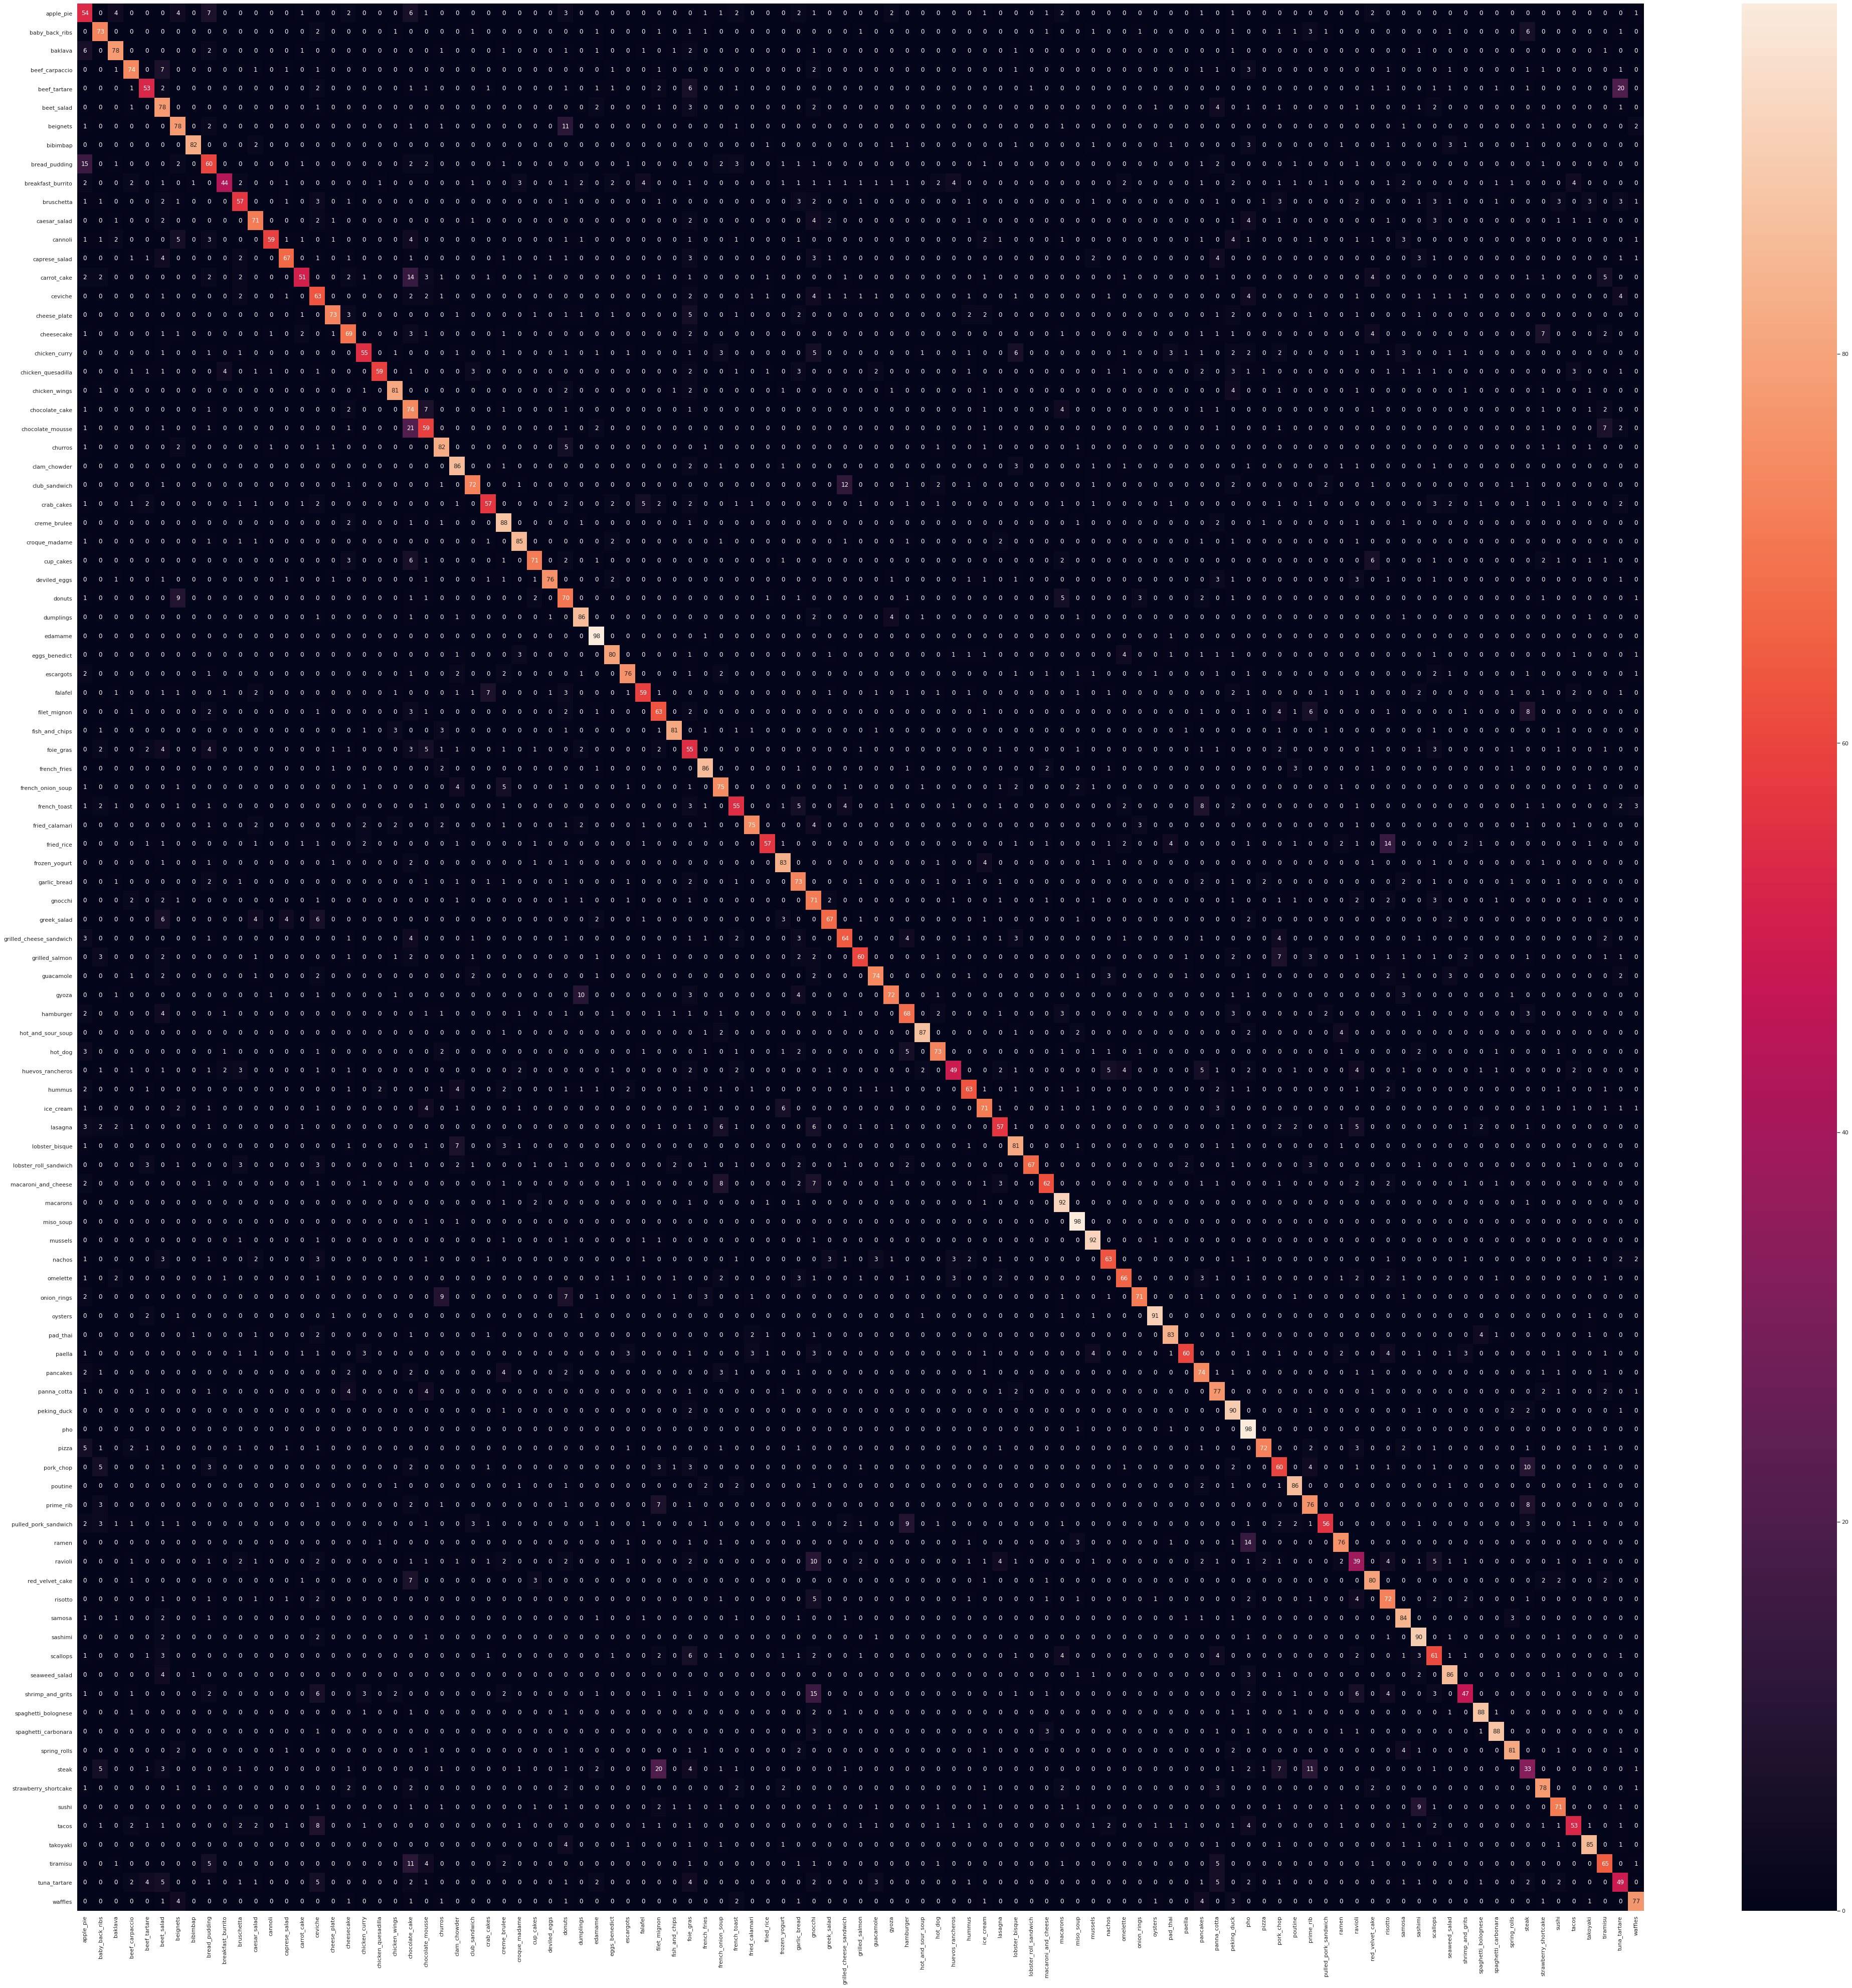

In [52]:
plt.figure(figsize=(70,70))
sns.heatmap(cm_df,annot=True)

In [59]:
from sklearn.metrics import classification_report

In [64]:
report=classification_report(test_class,pred_class,output_dict=True)
report

{'0': {'f1-score': 0.47161572052401746,
  'precision': 0.4186046511627907,
  'recall': 0.54,
  'support': 100},
 '1': {'f1-score': 0.7019230769230769,
  'precision': 0.6759259259259259,
  'recall': 0.73,
  'support': 100},
 '10': {'f1-score': 0.6195652173913043,
  'precision': 0.6785714285714286,
  'recall': 0.57,
  'support': 100},
 '100': {'f1-score': 0.7857142857142857,
  'precision': 0.8020833333333334,
  'recall': 0.77,
  'support': 100},
 '11': {'f1-score': 0.7208121827411167,
  'precision': 0.7319587628865979,
  'recall': 0.71,
  'support': 100},
 '12': {'f1-score': 0.7239263803680981,
  'precision': 0.9365079365079365,
  'recall': 0.59,
  'support': 100},
 '13': {'f1-score': 0.7403314917127072,
  'precision': 0.8271604938271605,
  'recall': 0.67,
  'support': 100},
 '14': {'f1-score': 0.6257668711656442,
  'precision': 0.8095238095238095,
  'recall': 0.51,
  'support': 100},
 '15': {'f1-score': 0.5338983050847458,
  'precision': 0.4632352941176471,
  'recall': 0.63,
  'support'

In [66]:
f1_score={}

for a,b in report.items():
  if a == "accuracy":
    break
  else:
    f1_score[class_name[int(a)]]=b['f1-score']

f1_score

{'apple_pie': 0.47161572052401746,
 'baby_back_ribs': 0.7019230769230769,
 'baklava': 0.7839195979899497,
 'beef_carpaccio': 0.7474747474747474,
 'beef_tartare': 0.6057142857142856,
 'beet_salad': 0.6141732283464567,
 'beignets': 0.7155963302752293,
 'bibimbap': 0.8864864864864864,
 'bread_pudding': 0.5607476635514018,
 'breakfast_burrito': 0.5714285714285714,
 'bruschetta': 0.6195652173913043,
 'caesar_salad': 0.7208121827411167,
 'cannoli': 0.7239263803680981,
 'caprese_salad': 0.7403314917127072,
 'carrot_cake': 0.6257668711656442,
 'ceviche': 0.5338983050847458,
 'cheese_plate': 0.8021978021978022,
 'cheesecake': 0.6798029556650246,
 'chicken_curry': 0.6395348837209303,
 'chicken_quesadilla': 0.7239263803680981,
 'chicken_wings': 0.8350515463917526,
 'chocolate_cake': 0.513888888888889,
 'chocolate_mousse': 0.5673076923076923,
 'churros': 0.7699530516431924,
 'clam_chowder': 0.7889908256880733,
 'club_sandwich': 0.7700534759358287,
 'crab_cakes': 0.6514285714285714,
 'creme_brulee'

In [68]:
f1_report=pd.DataFrame({"class name":list(f1_score.keys()),
                        "f1 score":list(f1_score.values())}).sort_values("f1 score",ascending=False)

f1_report

,class name,f1 score
69,oysters,0.923858
54,hot_and_sour_soup,0.901554
64,miso_soup,0.894977
91,spaghetti_carbonara,0.888889
7,bibimbap,0.886486
...,...,...
99,tuna_tartare,0.487562
0,apple_pie,0.471616
39,foie_gras,0.445344
82,ravioli,0.404145


In [70]:
f1_report[-20:]

,class name,f1 score
5,beet_salad,0.614173
4,beef_tartare,0.605714
56,huevos_rancheros,0.601227
42,french_toast,0.594595
87,scallops,0.586538
37,filet_mignon,0.583333
9,breakfast_burrito,0.571429
77,pork_chop,0.571429
31,donuts,0.569106
22,chocolate_mousse,0.567308


In [71]:
f1_report[:20]

,class name,f1 score
69,oysters,0.923858
54,hot_and_sour_soup,0.901554
64,miso_soup,0.894977
91,spaghetti_carbonara,0.888889
7,bibimbap,0.886486
90,spaghetti_bolognese,0.884422
33,edamame,0.882883
65,mussels,0.859813
38,fish_and_chips,0.852632
28,croque_madame,0.850000
